# GradCAM Visualization Demo with ResNet101

Requirement:

* GPU Memory: 6GB or higher


In [1]:
import numpy as np
import tensorflow as tf
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50    import decode_predictions
import os
from tensorflow.python.framework import ops
from tensorflow.python.ops import gen_nn_ops
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

import numpy as np

from tensorflow.contrib.slim.python.slim.nets  import resnet_v1
slim = tf.contrib.slim

import utils

from tensorflow.python.framework import ops
from tensorflow.python.ops import gen_nn_ops

C:\Users\wukai\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Replace vanila relu to guided relu to get guided backpropagation.

@ops.RegisterGradient("GuidedRelu")
def _GuidedReluGrad(op, grad):
    return tf.where(0. < grad, gen_nn_ops.relu_grad(grad, op.outputs[0]), tf.zeros(grad.get_shape()))

In [3]:
folder = './input/'
filenames   = os.listdir(folder)
line_number = len(filenames)
print(filenames,line_number)
batch_img,batch_label = [],[]
resnet50 = ResNet50(weights='imagenet')
for line, filename in enumerate(filenames):
    raw_image  = load_img(folder + filename,target_size=(224, 224))
    batch = img_to_array(raw_image)
    batch = batch.reshape((1, 224, 224, 3))
    pred = resnet50.predict(batch)
    index = np.argmax(pred)
    label = decode_predictions(pred)[:3]
    # Now making batch image for Grad-CAM
    img = utils.load_image(folder + filename,normalize=False)
    batch_im = img.reshape((1, 224, 224, 3))
    batch_img.append(batch_im)
    batch_label.append(np.array([1 if i == index else 0 for i in range(1000)]).reshape(1, -1))
batch_size = len(batch_img)
batch_img = np.concatenate(tuple(batch_img),0)
batch_label = np.concatenate(tuple(batch_label),0)

print(batch_img.shape)

['agama.jpg', 'agama_FGSM.jpg', 'dog.jpg', 'dog_FGSM.jpg', 'magpie.jpg', 'magpie_FGSM.jpg', 'pandas.jpg', 'pandas_FGSM.jpg', 'z_perlin_noise.jpg', 'z_UAP.JPG'] 10


C:\Users\wukai\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(10, 224, 224, 3)


cost: Tensor("mul_1:0", shape=(10, 10, 1000), dtype=float32)
y_c: Tensor("Sum_1:0", shape=(10, 10, 1000), dtype=float32)
INFO:tensorflow:Restoring parameters from model/resnet_v1_101.ckpt
Top1:  n01687978 agama 0.9972568
Top5:  [('n01687978 agama', 0.9972568), ('n01685808 whiptail, whiptail lizard', 0.000496891), ('n01689811 alligator lizard', 0.00037265752), ('n01630670 common newt, Triturus vulgaris', 0.00036115467), ('n01675722 banded gecko', 0.00014055877)]
grads_val shape: (7, 7, 2048)
gb_viz shape: (224, 224, 3)


C:\Users\wukai\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


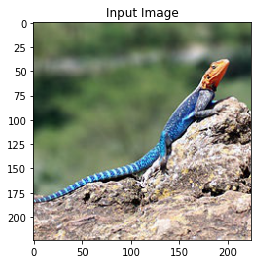

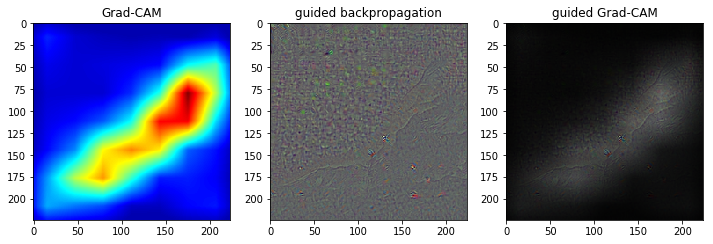

Top1:  n01687978 agama 0.9842128
Top5:  [('n01687978 agama', 0.9842128), ('n01685808 whiptail, whiptail lizard', 0.0026560833), ('n01728920 ringneck snake, ring-necked snake, ring snake', 0.0022077803), ('n01630670 common newt, Triturus vulgaris', 0.0012413827), ('n01748264 Indian cobra, Naja naja', 0.0007020146)]
grads_val shape: (7, 7, 2048)
gb_viz shape: (224, 224, 3)


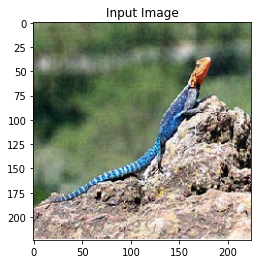

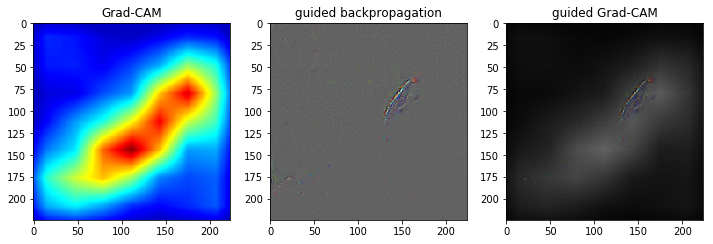

Top1:  n02099712 Labrador retriever 0.69541574
Top5:  [('n02099712 Labrador retriever', 0.69541574), ('n02099601 golden retriever', 0.13908805), ('n02090379 redbone', 0.019563725), ('n02088238 basset, basset hound', 0.019487824), ('n02088466 bloodhound, sleuthhound', 0.01428727)]
grads_val shape: (7, 7, 2048)
gb_viz shape: (224, 224, 3)


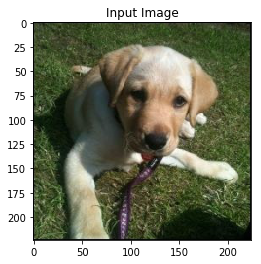

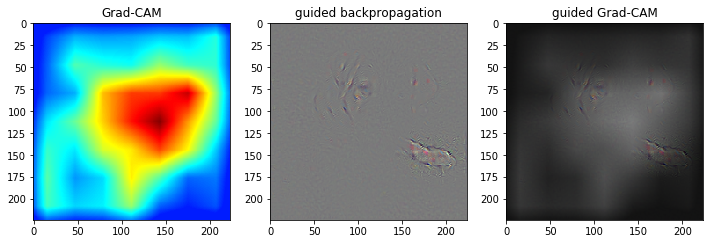

Top1:  n02099849 Chesapeake Bay retriever 0.43797117
Top5:  [('n02099849 Chesapeake Bay retriever', 0.43797117), ('n02099712 Labrador retriever', 0.18087465), ('n02087394 Rhodesian ridgeback', 0.045925103), ('n02096051 Airedale, Airedale terrier', 0.039365396), ('n02100583 vizsla, Hungarian pointer', 0.037928607)]
grads_val shape: (7, 7, 2048)
gb_viz shape: (224, 224, 3)


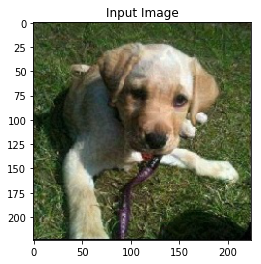

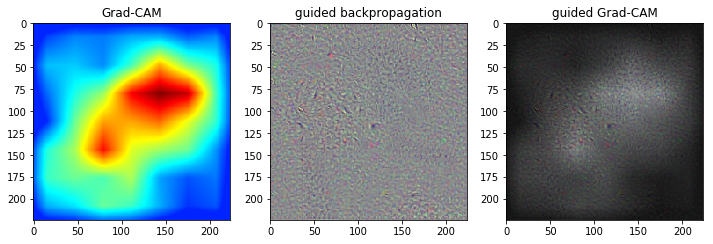

Top1:  n01582220 magpie 0.9914288
Top5:  [('n01582220 magpie', 0.9914288), ('n01795545 black grouse', 0.0022710257), ('n02037110 oystercatcher, oyster catcher', 0.0010724225), ('n01580077 jay', 0.00040864135), ('n04033901 quill, quill pen', 0.0003703068)]
grads_val shape: (7, 7, 2048)
gb_viz shape: (224, 224, 3)


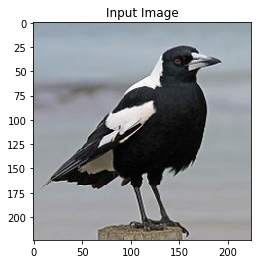

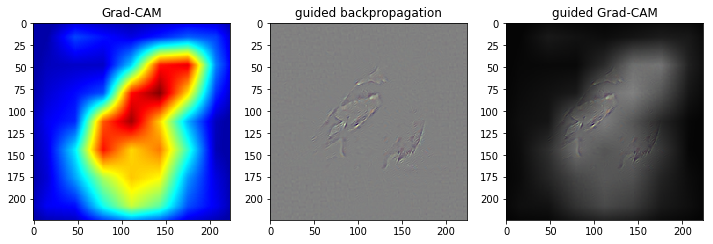

Top1:  n01616318 vulture 0.22558181
Top5:  [('n01616318 vulture', 0.22558181), ('n01582220 magpie', 0.1610051), ('n01601694 water ouzel, dipper', 0.08887561), ('n01795545 black grouse', 0.083413154), ('n01608432 kite', 0.07447612)]
grads_val shape: (7, 7, 2048)
gb_viz shape: (224, 224, 3)


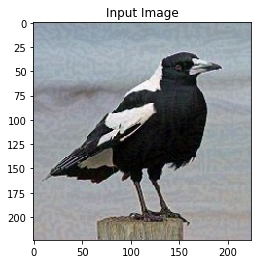

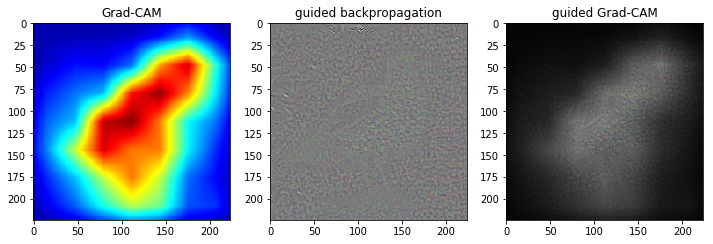

Top1:  n02510455 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca 0.99680245
Top5:  [('n02510455 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca', 0.99680245), ('n02509815 lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens', 0.00047624263), ('n02488702 colobus, colobus monkey', 0.0003440749), ('n02483362 gibbon, Hylobates lar', 0.00016452101), ('n04399382 teddy, teddy bear', 0.00016169703)]
grads_val shape: (7, 7, 2048)
gb_viz shape: (224, 224, 3)


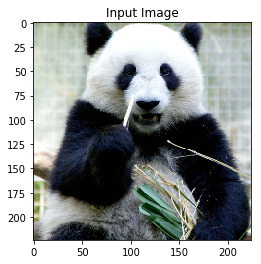

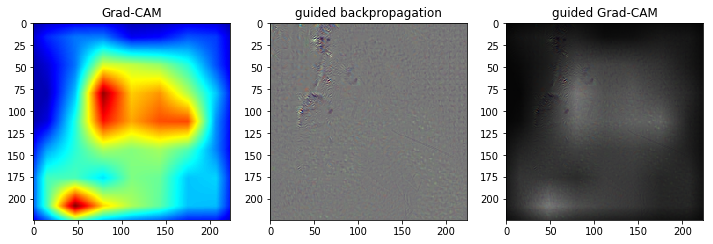

Top1:  n02510455 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca 0.97880024
Top5:  [('n02510455 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca', 0.97880024), ('n02483362 gibbon, Hylobates lar', 0.0036953748), ('n02484975 guenon, guenon monkey', 0.0025338288), ('n02488702 colobus, colobus monkey', 0.0020194217), ('n02509815 lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens', 0.0017055348)]
grads_val shape: (7, 7, 2048)
gb_viz shape: (224, 224, 3)


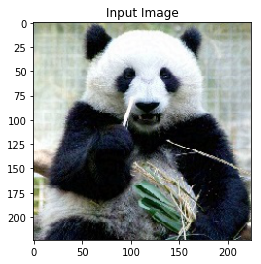

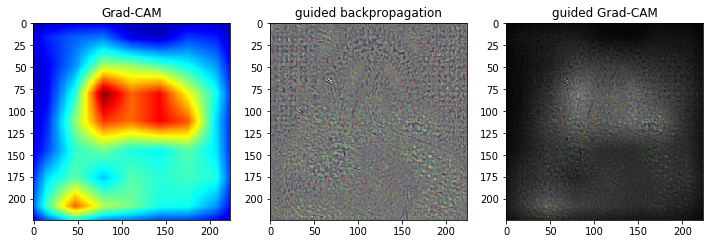

Top1:  n02892201 brass, memorial tablet, plaque 0.14574882
Top5:  [('n02892201 brass, memorial tablet, plaque', 0.14574882), ('n03717622 manhole cover', 0.12735185), ('n02840245 binder, ring-binder', 0.11212548), ('n03642806 laptop, laptop computer', 0.03908452), ('n07248320 book jacket, dust cover, dust jacket, dust wrapper', 0.030236369)]
grads_val shape: (7, 7, 2048)
gb_viz shape: (224, 224, 3)


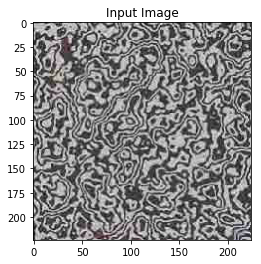

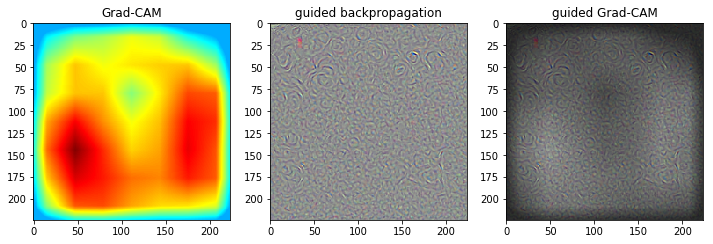

Top1:  n03450230 gown 0.33402506
Top5:  [('n03450230 gown', 0.33402506), ('n04136333 sarong', 0.16294378), ('n03045698 cloak', 0.06750606), ('n04599235 wool, woolen, woollen', 0.024859706), ('n01514668 cock', 0.022825085)]
grads_val shape: (7, 7, 2048)
gb_viz shape: (224, 224, 3)


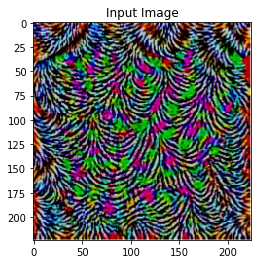

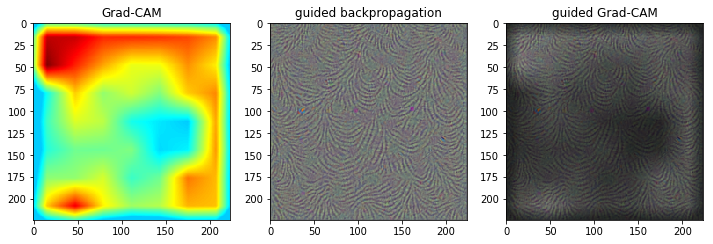

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline



eval_graph = tf.Graph()
with eval_graph.as_default():
    with eval_graph.gradient_override_map({'Relu': 'GuidedRelu'}):
        images = tf.placeholder("float", [batch_size, 224, 224, 3])
        labels = tf.placeholder(tf.float32, [batch_size, 1000])
        
        preprocessed_images = utils.resnet_preprocess(images)
        
        with slim.arg_scope(resnet_v1.resnet_arg_scope()):
            with slim.arg_scope([slim.batch_norm], is_training=False):
                # is_training=False means batch-norm is not in training mode. Fixing batch norm layer.
                # net is logit for resnet_v1. See is_training messing up issue: https://github.com/tensorflow/tensorflow/issues/4887
                net, end_points = resnet_v1.resnet_v1_101(preprocessed_images, 1000)
        prob = end_points['predictions'] # after softmax
        
        cost = (-1) * tf.reduce_sum(tf.multiply(labels, tf.log(prob)), axis=1)
        print('cost:', cost)
        y_c = tf.reduce_sum(tf.multiply(net, labels), axis=1)
        print('y_c:', y_c)

        # Get last convolutional layer gradient for generating gradCAM visualization
        # print('endpoints:', end_points.keys())
        target_conv_layer = end_points['resnet_v1_101/block4/unit_2/bottleneck_v1']
        target_conv_layer_grad = tf.gradients(y_c, target_conv_layer)[0]

        # Guided backpropagtion back to input layer
        gb_grad = tf.gradients(cost, images)[0]

        init = tf.global_variables_initializer()
        
        # Load resnet v1 weights
        
        # latest_checkpoint = tf.train.latest_checkpoint("model/resnet_v1_50.ckpt")
        latest_checkpoint = "model/resnet_v1_101.ckpt"
        ## Optimistic restore.
        reader = tf.train.NewCheckpointReader(latest_checkpoint)
        saved_shapes = reader.get_variable_to_shape_map()
        variables_to_restore = tf.global_variables()
        for var in variables_to_restore:
          if not var.name.split(':')[0] in saved_shapes:
            print("WARNING. Saved weight not exists in checkpoint. Init var:", var.name)
          else:
            # print("Load saved weight:", var.name)
            pass

        var_names = sorted([(var.name, var.name.split(':')[0]) for var in variables_to_restore
                if var.name.split(':')[0] in saved_shapes])
        restore_vars = []
        with tf.variable_scope('', reuse=True):
            for var_name, saved_var_name in var_names:
                try:
                    curr_var = tf.get_variable(saved_var_name)
                    var_shape = curr_var.get_shape().as_list()
                    if var_shape == saved_shapes[saved_var_name]:
                        # print("restore var:", saved_var_name)
                        restore_vars.append(curr_var)
                except ValueError:
                    print("Ignore due to ValueError on getting var:", saved_var_name) 
        saver = tf.train.Saver(restore_vars)
        
        
        
# Run tensorflow 

with tf.Session(graph=eval_graph) as sess:    
    sess.run(init)    
    # sess.run(tf.local_variables_initializer())
    saver.restore(sess, latest_checkpoint)
    
    prob = sess.run(prob, feed_dict={images: batch_img})
    
    # gb_grad_value, target_conv_layer_value, target_conv_layer_grad_value = sess.run([gb_grad, target_conv_layer, target_conv_layer_grad], feed_dict={images: batch_img, labels: prob})
    gb_grad_value, target_conv_layer_value, target_conv_layer_grad_value = sess.run([gb_grad, target_conv_layer, target_conv_layer_grad], feed_dict={images: batch_img, labels: batch_label})    
    
    for i in range(batch_size):
        # print('See visualization of below category')
        # utils.print_prob(batch_label[i], './synset.txt')
        utils.print_prob_res(prob[i], './synset.txt')
        # print('gb_grad_value[i]:', gb_grad_value[i])
        # print('gb_grad_value[i] shape:', gb_grad_value[i].shape)
        utils.visualize(batch_img[i], target_conv_layer_value[i], target_conv_layer_grad_value[i], gb_grad_value[i])
    